In [1]:
import numpy as np
import os
from dopamine.colab import utils as colab_utils
from absl import flags

ALL_GAMES = [
    'AirRaid',
    'Alien',
    'Amidar',
    'Assault',
    'Asterix',
    'Asteroids',
    'Atlantis',
    'BankHeist',
    'BattleZone',
    'BeamRider',
    'Berzerk',
    'Bowling',
    'Boxing',
    'Breakout',
    'Carnival',
    'Centipede',
    'ChopperCommand',
    'CrazyClimber',
    'DemonAttack',
    'DoubleDunk',
    'ElevatorAction',
    'Enduro',
    'FishingDerby',
    'Freeway',
    'Frostbite',
    'Gopher',
    'Gravitar',
    'Hero',
    'IceHockey',
    'Jamesbond',
    'JourneyEscape',
    'Kangaroo',
    'Krull',
    'KungFuMaster',
    'MontezumaRevenge',
    'MsPacman',
    'NameThisGame',
    'Phoenix',
    'Pitfall',
    'Pong',
    'Pooyan',
    'PrivateEye',
    'Qbert',
    'Riverraid',
    'RoadRunner',
    'Robotank',
    'Seaquest',
    'Skiing',
    'Solaris',
    'SpaceInvaders',
    'StarGunner',
    'Tennis',
    'TimePilot',
    'Tutankham',
    'UpNDown',
    'Venture',
    'VideoPinball',
    'WizardOfWor',
    'YarsRevenge',
    'Zaxxon',
]

2025-04-25 13:01:05.816782: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-25 13:01:06.386332: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745582466.583512    3803 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745582466.640220    3803 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745582467.132444    3803 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
# move the desired folder
%cd ..

/home/zosov/workspace/bisimulation-PER


## Example 1: Plot against Dopamine baselines

In [3]:
# NOTE: it requires and older version of pandas
# Execute with the environment and save the results as a CSV
# experimental_data = colab_utils.load_baselines('./dopamine_logs')

In [4]:
# experimental_data

In [5]:
# algorithms = ['dqn', 'c51', 'rainbow', 'iqn']

# # Filter the DQN results
# def filter_data(experimental_data, algorithm='dqn'):
#     """Filter the experimental data to only include DQN results."""
#     filtered_data = {}
#     for game, data in experimental_data.items():
#         filtered_data[game] = data[data['agent'] == algorithm]
#     return filtered_data

In [6]:

# for algorithm  in algorithms:
#     # Filter the data for the current algorithm
#     filtered_data = filter_data(experimental_data, algorithm)
    
#     # Save the filtered data to a CSV file
#     for game_name in ALL_GAMES:
#         game_data = filtered_data[game_name]
        
#         # Create the output directory if it doesn't exist
#         output_dir = f'outputs/baselines/{algorithm}'
#         os.makedirs(output_dir, exist_ok=True)

#         # Save each game's data to a separate CSV file
#         game_data.to_csv(f'outputs/baselines/{algorithm}/{game_name}_data.csv', index=False)
#         print(f"Saved {algorithm} data for {game_name} to {output_dir}/{game_name}_data.csv")


In [7]:
# Load the data from the CSV files into a dictionary of dataframes
import pandas as pd

def load_baselines(load_path = 'outputs/baselines/dqn'):
    dataframes = {}
    for game_name in ALL_GAMES:
        # Load each game's data from the CSV file
        df = pd.read_csv(f'{load_path}/{game_name}_data.csv')
        
        # Store the dataframe in the dictionary
        dataframes[game_name] = df

    return dataframes

dataframes = load_baselines(load_path = 'outputs/baselines/dqn')
dataframes

{'AirRaid':      run_number  iteration  train_episode_returns agent
 0           1.0        0.0             514.980545   dqn
 1           1.0        1.0             367.689295   dqn
 2           1.0        2.0             553.518124   dqn
 3           1.0        3.0            1090.991903   dqn
 4           1.0        4.0            1484.080189   dqn
 ..          ...        ...                    ...   ...
 990         5.0      194.0            6738.218391   dqn
 991         5.0      195.0            7486.250000   dqn
 992         5.0      196.0            7756.493506   dqn
 993         5.0      197.0            7641.346154   dqn
 994         5.0      198.0            7653.481013   dqn
 
 [995 rows x 4 columns],
 'Alien':      run_number  iteration  train_episode_returns agent
 0           1.0        0.0             297.572559   dqn
 1           1.0        1.0             461.618357   dqn
 2           1.0        2.0             536.330049   dqn
 3           1.0        3.0             5

# Mergin New Results

In [8]:
import itertools
import pandas as pd
from dopamine.colab.utils import load_statistics, summarize_data, read_experiment
import numpy as np

In [9]:
dataframes

{'AirRaid':      run_number  iteration  train_episode_returns agent
 0           1.0        0.0             514.980545   dqn
 1           1.0        1.0             367.689295   dqn
 2           1.0        2.0             553.518124   dqn
 3           1.0        3.0            1090.991903   dqn
 4           1.0        4.0            1484.080189   dqn
 ..          ...        ...                    ...   ...
 990         5.0      194.0            6738.218391   dqn
 991         5.0      195.0            7486.250000   dqn
 992         5.0      196.0            7756.493506   dqn
 993         5.0      197.0            7641.346154   dqn
 994         5.0      198.0            7653.481013   dqn
 
 [995 rows x 4 columns],
 'Alien':      run_number  iteration  train_episode_returns agent
 0           1.0        0.0             297.572559   dqn
 1           1.0        1.0             461.618357   dqn
 2           1.0        2.0             536.330049   dqn
 3           1.0        3.0             5

In [10]:
!ls

Dockerfile		       job_metric_dqn_bper_gpu.sh
LICENSE			       jobs_multiple_gpu.sh
README.md		       jupyter_notebooks
__pycache__		       logs
atari_100k		       metric_dqn_agent.py
baselines		       metric_dqn_bper_agent.py
clean_all_checkpoints_game.sh  metric_implicit_quantile_agent.py
clean_checkpoints.sh	       metric_quantile_agent.py
dopamine_logs		       metric_rainbow_agent.py
dqn.gin			       metric_utils.py
dqn_profiling.gin	       outputs
enough_disk_space.py	       run-script.sh
enough_resources.py	       syncronize_results.sh
job_cpu_profiling.sh	       test.py
job_metric_dqn_bper_cpu.sh     train.py


In [11]:
import collections

game = 'Hero'
results = read_experiment( log_path = f"logs/{game}/",
                     parameter_set= collections.OrderedDict([
                         ('agent', ["metric_dqn", 'metric_dqn_per', 'metric_dqn_bper']),
                         ('run_number', ['118398', '711872', '919409']),
                     ]),
                     job_descriptor='{}/{}',
                     summary_keys=['train_episode_returns'],)
results

,agent,run_number,iteration,train_episode_returns
0,metric_dqn,118398.0,0.0,1031.859606
1,metric_dqn,118398.0,1.0,2213.878049
2,metric_dqn,118398.0,2.0,2609.000000
3,metric_dqn,118398.0,3.0,2884.771242
4,metric_dqn,118398.0,4.0,2974.258065
...,...,...,...,...
895,metric_dqn_bper,919409.0,95.0,15972.341040
896,metric_dqn_bper,919409.0,96.0,17406.792453
897,metric_dqn_bper,919409.0,97.0,17791.346154
898,metric_dqn_bper,919409.0,98.0,17807.327044


In [12]:
# Load dqn baseline data
dataframes = load_baselines(load_path = 'outputs/baselines/dqn')

# Merging the new results to the existing data frame
dataframes[game] = dataframes[game].merge(
    results, how='outer')

In [13]:
# Plot the baselines and my results
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# GAMES = ['Asteroids']
def plot_game(game, dataframes):
    # Define a custom color palette with 4 colors
    custom_palette = {
        "metric_dqn": "#1f77b4",       # Blue
        "metric_dqn_per": "#ff7f0e",   # Orange
        "metric_dqn_bper": "#2ca02c",  # Green
        "dqn": "#d62728",               # Red
        "metric_dqn_bper_norm": "#9467bd", # Purple
        "metric_dqn_bper_no_norm": "#2ca02c",  # Green
        "metric_dqn_bper_scaling": "#9467bd", # Brown
        "metric_dqn_bper_softmax": "#000000", # Black
        "metric_dqn_bper_softmax_weight": "#8c564b", # Light Pink
        "metric_dqn_bper_exponential_norm": "#e377c2", # Light Purple
        "metric_dqn_bper_td_weights" : "#7f7f7f", # Gray

    }

    # Filter the data to include only the first 100 iterations
    filtered_data = dataframes[game][dataframes[game]['iteration'] < 100]

    fig, ax = plt.subplots(figsize=(16,8))
    sns.lineplot(x='iteration', y='train_episode_returns', hue='agent',
                data=filtered_data, ax=ax, palette=custom_palette)
    plt.title(game)
    plt.show()

# plot_game(game = 'Hero', dataframes = dataframes)

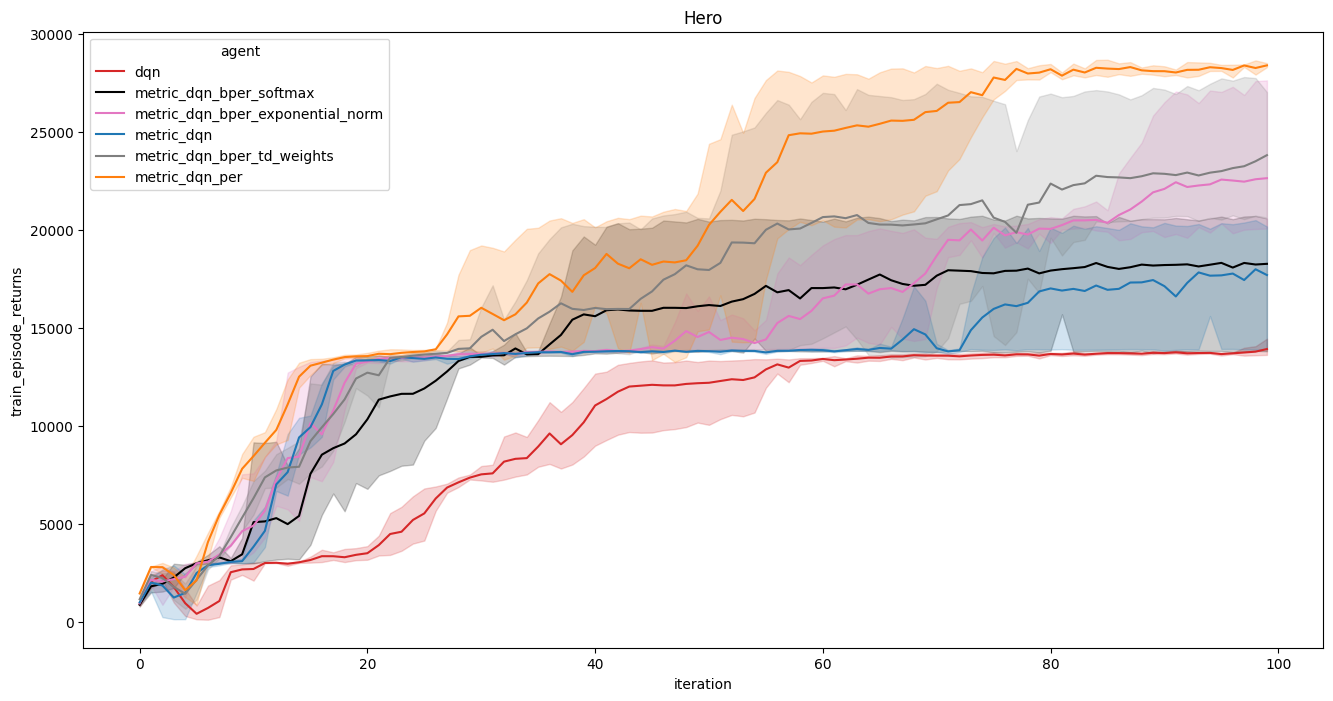

In [14]:
# NOTE: Synchronize the results from the ssh server before runing the next cell

game = 'Hero'
results = read_experiment( log_path = f"logs/{game}/",
                     parameter_set= collections.OrderedDict([
                         ('agent', ["metric_dqn", 
                                    'metric_dqn_per', 
                                    # "metric_dqn_bper_scaling", 
                                    'metric_dqn_bper_softmax',
                                    # 'metric_dqn_bper_softmax_weight',
                                    "metric_dqn_bper_exponential_norm",
                                    "metric_dqn_bper_td_weights"]),
                         ('run_number', ['118398', '711872', '919409']),
                     ]),
                     job_descriptor='{}/{}',
                     summary_keys=['train_episode_returns'],)

# Load dqn baseline data
dataframes = load_baselines(load_path = 'outputs/baselines/dqn')

# Merging the new results to the existing data frame
dataframes[game] = dataframes[game].merge(
    results, how='outer')

# Plot the baselines and my results
plot_game(game = game, dataframes = dataframes)

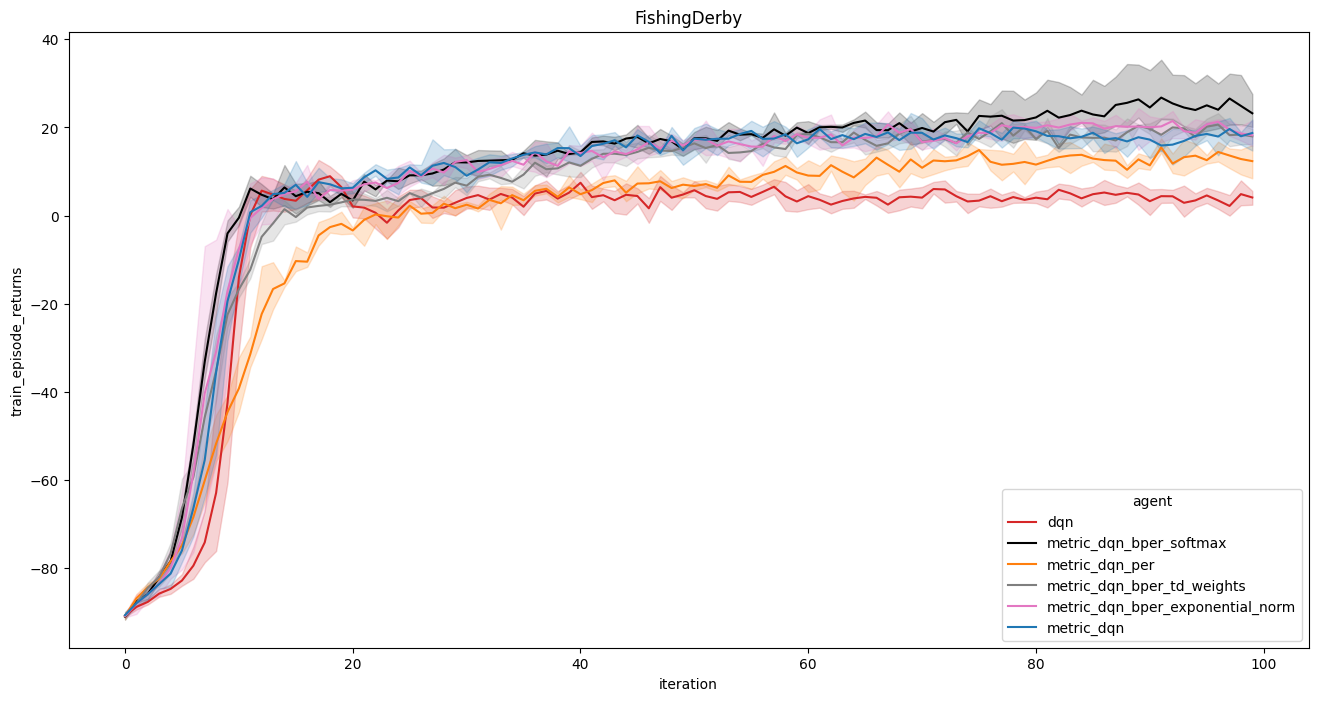

In [15]:
# NOTE: Synchronize the results from the ssh server before runing the next cell

game = 'FishingDerby'
results = read_experiment( log_path = f"logs/{game}/",
                     parameter_set= collections.OrderedDict([
                         ('agent', ["metric_dqn", 
                                    'metric_dqn_per', 
                                    # "metric_dqn_bper_scaling", 
                                    'metric_dqn_bper_softmax',
                                    # 'metric_dqn_bper_softmax_weight',
                                    "metric_dqn_bper_exponential_norm",
                                    "metric_dqn_bper_td_weights"]),
                         ('run_number', ['118398', '711872', '919409']),
                     ]),
                     job_descriptor='{}/{}',
                     summary_keys=['train_episode_returns'],)

# Load dqn baseline data
dataframes = load_baselines(load_path = 'outputs/baselines/dqn')

# Merging the new results to the existing data frame
dataframes[game] = dataframes[game].merge(
    results, how='outer')

# Plot the baselines and my results
plot_game(game = game, dataframes = dataframes)

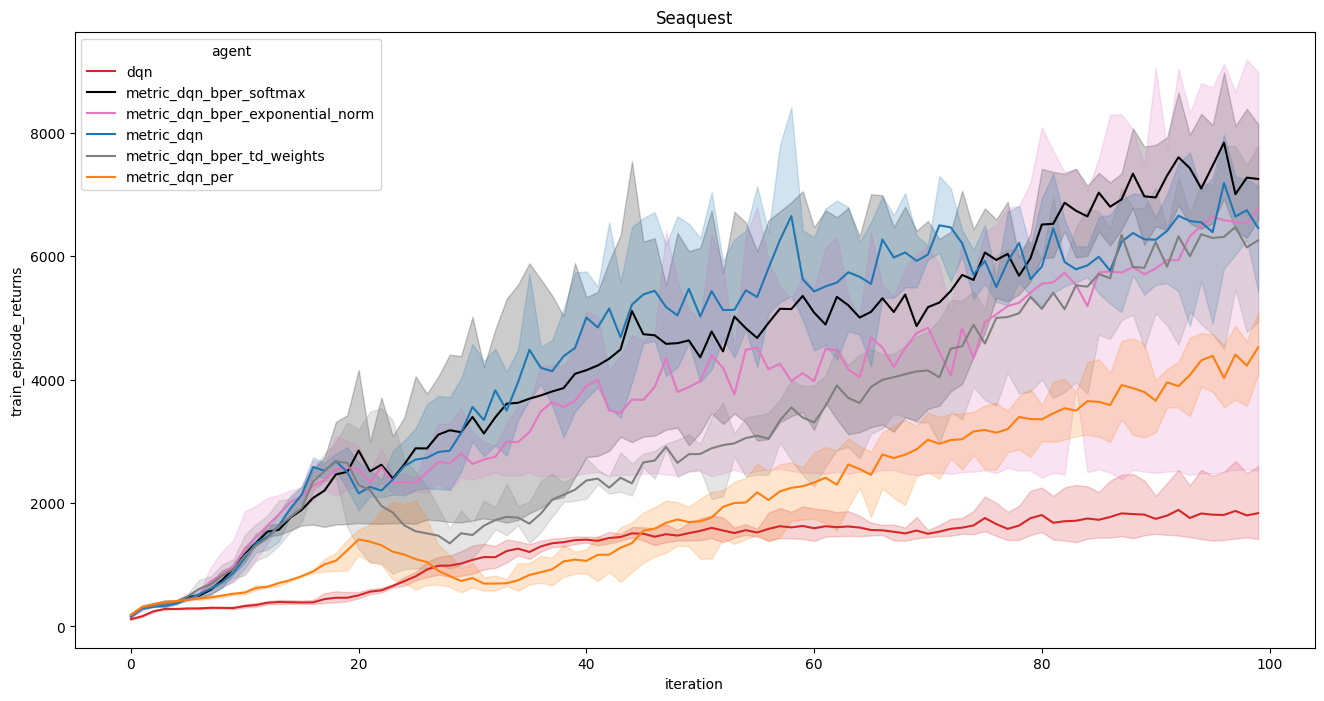

In [16]:
# NOTE: Synchronize the results from the ssh server before runing the next cell

game = 'Seaquest'
results = read_experiment( log_path = f"logs/{game}/",
                     parameter_set= collections.OrderedDict([
                         ('agent', ["metric_dqn", 
                                    'metric_dqn_per', 
                                    # "metric_dqn_bper_scaling", 
                                    'metric_dqn_bper_softmax',
                                    # 'metric_dqn_bper_softmax_weight',
                                    "metric_dqn_bper_exponential_norm",
                                    "metric_dqn_bper_td_weights"]),
                         ('run_number', ['118398', '711872', '919409']),
                     ]),
                     job_descriptor='{}/{}',
                     summary_keys=['train_episode_returns'],)

# Load dqn baseline data
dataframes = load_baselines(load_path = 'outputs/baselines/dqn')

# Merging the new results to the existing data frame
dataframes[game] = dataframes[game].merge(
    results, how='outer')

# Plot the baselines and my results
plot_game(game = game, dataframes = dataframes)

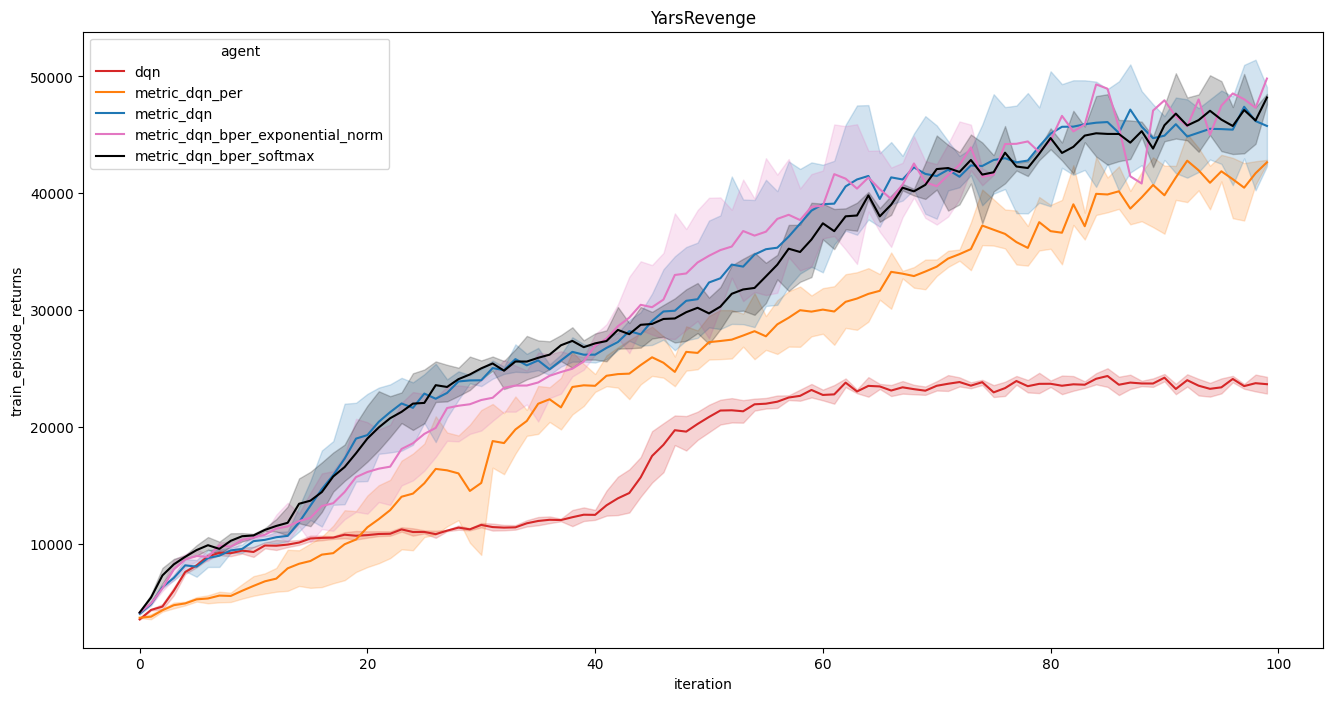

In [17]:
# NOTE: Synchronize the results from the ssh server before runing the next cell

game = 'YarsRevenge'
results = read_experiment( log_path = f"logs/{game}/",
                     parameter_set= collections.OrderedDict([
                         ('agent', ["metric_dqn", 
                                    'metric_dqn_per', 
                                    'metric_dqn_bper_softmax',
                                    "metric_dqn_bper_exponential_norm",
                                    # "metric_dqn_bper_td_weights"
                                    ]),
                         ('run_number', ['118398', '711872', '919409']),
                     ]),
                     job_descriptor='{}/{}',
                     summary_keys=['train_episode_returns'],)

# Load dqn baseline data
dataframes = load_baselines(load_path = 'outputs/baselines/dqn')

# Merging the new results to the existing data frame
dataframes[game] = dataframes[game].merge(
    results, how='outer')

# Plot the baselines and my results
plot_game(game = game, dataframes = dataframes)

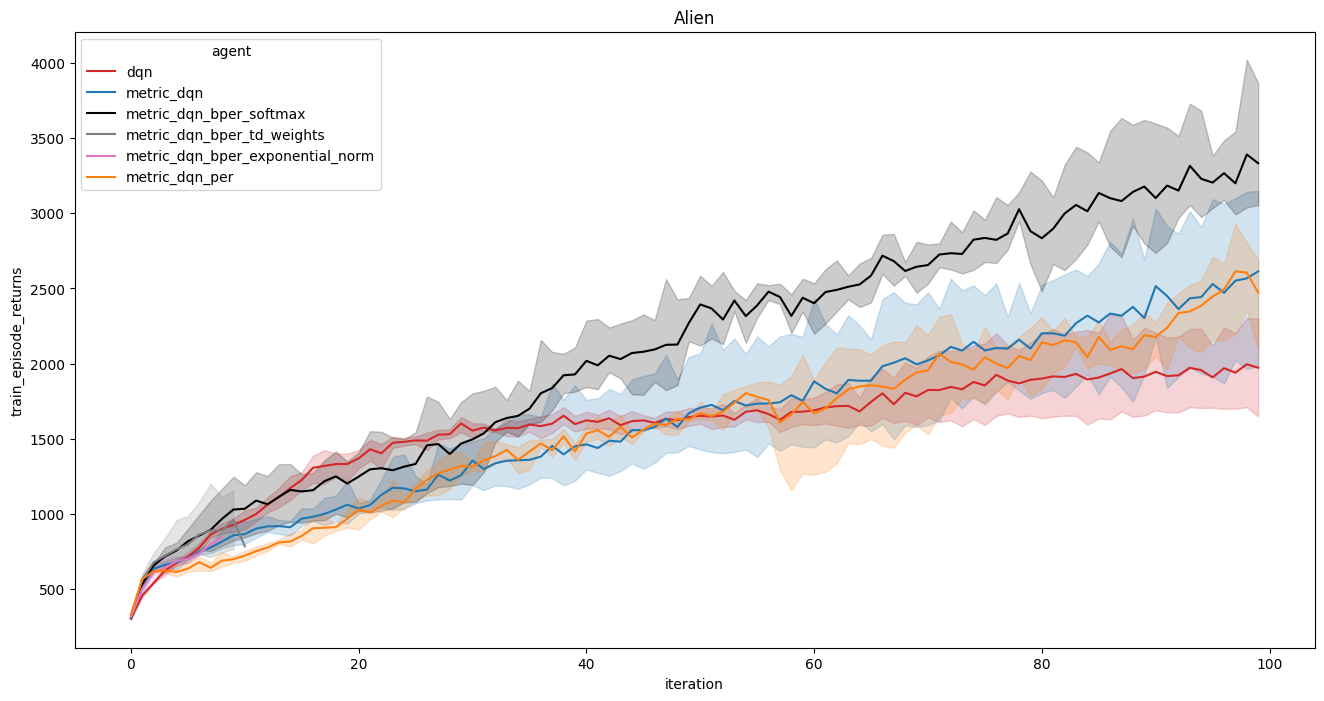

In [18]:
# NOTE: Synchronize the results from the ssh server before runing the next cell

game = 'Alien'
results = read_experiment( log_path = f"logs/{game}/",
                     parameter_set= collections.OrderedDict([
                                    ('agent', ["metric_dqn", 
                                    'metric_dqn_per', 
                                    'metric_dqn_bper_softmax',
                                    "metric_dqn_bper_exponential_norm",
                                    "metric_dqn_bper_td_weights"
                                    ]),
                         ('run_number', ['118398', '711872', '919409']),
                     ]),
                     job_descriptor='{}/{}',
                     summary_keys=['train_episode_returns'],)

# Load dqn baseline data
dataframes = load_baselines(load_path = 'outputs/baselines/dqn')

# Merging the new results to the existing data frame
dataframes[game] = dataframes[game].merge(
    results, how='outer')

# Plot the baselines and my results
plot_game(game = game, dataframes = dataframes)

# Loading Extra Results

In [60]:
import pandas as pd
from tensorboard.backend.event_processing import event_accumulator

def load_tensorboard_logs(log_path):
    """Load TensorBoard logs into a pandas DataFrame.
    
    Args:
        log_path (str): Path to directory containing TensorBoard event files
        
    Returns:
        pd.DataFrame: DataFrame containing all scalar metrics with columns:
                      'wall_time', 'step', 'value', 'metric'
    """
    # Load event files
    ea = event_accumulator.EventAccumulator(log_path,
        size_guidance={
            event_accumulator.TENSORS: 0,  # 0 means load all
        })
    ea.Reload()
    
    # Get all scalar tags
    tags = ea.Tags()['tensors']
    
    # Create DataFrame
    df = pd.DataFrame()
    
    for tag in tags:
        # Get scalar data for each tag
        events = ea.Tensors(tag)
        tag_df = pd.DataFrame([{
            'wall_time': e.wall_time,
            'step': e.step,
            'value': np.frombuffer(e.tensor_proto.tensor_content, 
                                   dtype=np.float32)[0],
            'metric': tag
        } for e in events])
        
        # Append to main DataFrame
        df = pd.concat([df, tag_df], ignore_index=True)
    
    return df

# Example usage:
df = load_tensorboard_logs('/home/zosov/workspace/bisimulation-PER/logs/Hero/metric_dqn/118398')
df.head()

,wall_time,step,value,metric
0,1.743542e+09,20000,0.034128,Losses/Aggregate
1,1.743542e+09,20500,0.006272,Losses/Aggregate
2,1.743542e+09,21000,0.033240,Losses/Aggregate
3,1.743542e+09,21500,0.004913,Losses/Aggregate
4,1.743542e+09,22000,0.002839,Losses/Aggregate


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151599 entries, 0 to 151598
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   wall_time  151599 non-null  float64
 1   step       151599 non-null  int64  
 2   value      151599 non-null  float32
 3   metric     151599 non-null  object 
dtypes: float32(1), float64(1), int64(1), object(1)
memory usage: 4.0+ MB
